# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 8</span>


> **Note** Results shown below are simulated by means of a Variational MonteCarlo code written as requested in Exercises $08.1$ and $08.2$

In [1]:
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D as axes
from matplotlib import cm
%matplotlib inline
plt.rcParams.update({'font.size': 13})


def Vpot(x_wf):
    return (x_wf**2 - 2.5)*x_wf**2
    #return 0.5*x_wf**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations
x_wf = np.linspace(-a/2, a/2, N)
dx_wf = x_wf[1] - x_wf[0] # the step size
V = Vpot(x_wf)
CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
H = (-(hbar**2)*CDiff)/(2*m*dx_wf**2) + np.diag(V)
E,psi = np.linalg.eigh(H)
psi = np.transpose(psi)
psi = psi/np.sqrt(dx_wf)

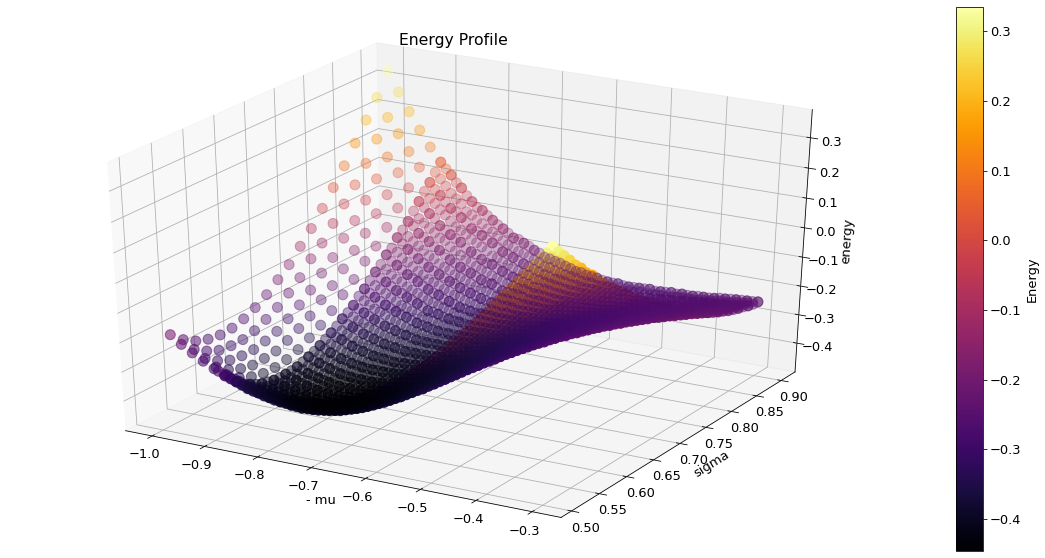

Optimal Parameters: mu=0.79, sigma=0.62


In [2]:
mu, sigma, ene = np.loadtxt("vmcdata/crop_energies.dat", usecols=[0,1,2], unpack=True)
fit=plt.figure(figsize=(20, 10))
ax=plt.gca(projection='3d')
scatterplot=ax.scatter(-mu, sigma, ene, s=100, c=ene, cmap='inferno')
ax.set_xlabel('- mu')
ax.set_ylabel('sigma')
ax.set_zlabel('energy')
cbar = fit.colorbar(scatterplot)
cbar.set_label('Energy')
plt.title('Energy Profile')
plt.show()


print('Optimal Parameters: mu=0.79, sigma=0.62')


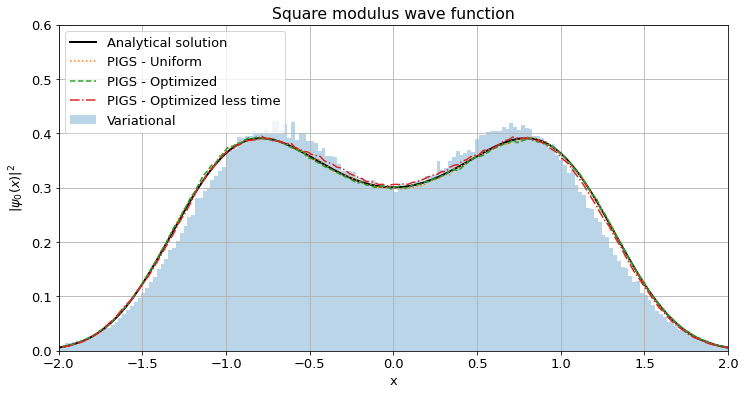

In [3]:
plt.figure(figsize=(12,6) )

plt.plot(x_wf,(psi[0])**2, color='black', label='Analytical solution', lw=2)

y = np.loadtxt("vmcdata/output_0.79_0.62", usecols=[0], unpack=True)
plt.hist(y, bins=250, alpha=0.3, density=True, label='Variational')

x, y = np.loadtxt("QMC_1D/uniform/probability.dat", usecols=[0,1], unpack=True)
plt.plot(x, y,  linestyle='dotted', label='PIGS - Uniform')

x, y = np.loadtxt("QMC_1D/myoptimized/probability.dat", usecols=[0,1], unpack=True)
plt.plot(x, y,  linestyle='dashed', label='PIGS - Optimized')

x, y = np.loadtxt("QMC_1D/myoptimized_lesstime/probability.dat",usecols=[0,1], unpack=True)
plt.plot(x, y, linestyle='dashdot', label='PIGS - Optimized less time')

#plt.plot(x,0.3*V, color='black')
plt.xlim((-2,2))
plt.ylim((-0.00006,0.6))
plt.legend()
plt.grid(True)
plt.title("Square modulus wave function")
plt.xlabel("x")
plt.ylabel(r"$|\psi_0(x)|^2$")

plt.show()

The WaveFunction calculated by means of my Variational MonteCarlo agrees quite well with the analytical one and the ones calculated by PIGS.

It's interesting to me that, not as I expected, the optimal mu is not close minima of the double well.

### Finite Temperature results

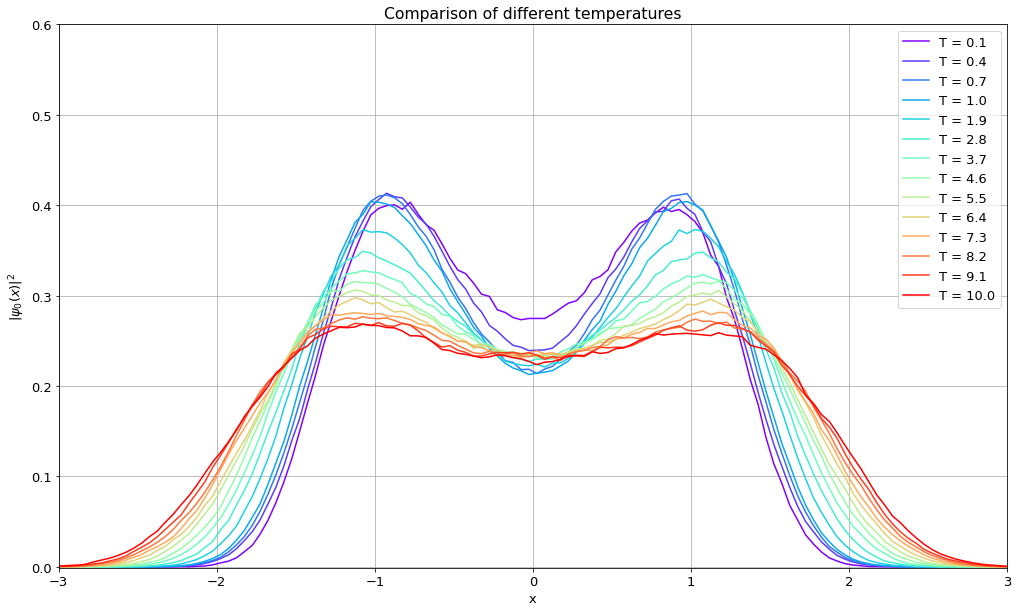

In [4]:
plt.figure(figsize=(17,10))
x=[0.1, 0.4, 0.7, 1., 1.9, 2.8, 3.7, 4.6, 5.5, 6.4, 7.3, 8.2, 9.1, 10.0]
colors = cm.rainbow(np.linspace(0, 1, len(x)))
for i, c in zip(x,colors):
    x,y = np.loadtxt('QMC_1D/t_'+str(round(i,2))+'/probability.dat', usecols=[0,1], unpack=True)
    plt.plot(x,y, color=c, label='T = '+str(round(i,2)) )

plt.xlim((-3,3))
plt.ylim((-0.001,0.6))
plt.legend()
plt.grid(True)
plt.title("Comparison of different temperatures")
plt.xlabel("x")
plt.ylabel(r"$|\psi_0(x)|^2$")
plt.show()

At finite temperature the state of the system becomes a quantum statistical state and the resulting wavefunction is a statistical superposition of the available energy levels. This cause the two peaks to flatten and the tails gets fatter with the increase of the temperature.